# Дискретные преобразования Фурье

## Одномерные быстрые преобразования Фурье

В состав NumPy входит ```numpy.fft``` – библиотека реализации быстрых преобразований Фурье (БПФ, FFT) для вычисления дискретного преобразования Фурье(ДПФ) с применением широко известного алгоритма Кули–Тьюки (Cooley-Tukey algorithm). Формула дискретного преобразования Фурье для функции, определенной в ```n``` точках ```fm``` при 
```m = 1, 2, …, n − 1```, используемая в NumPy:

![1.png](1.png)

В библиотеке NumPy основным методом дискретного преобразования Фурье для действительных и комплексных функций является ```np.fft.fft```. Если входная функция сигнала f  определяется во временно́м измерении, то выходное преобразование Фурье ```F``` определяется в частотном измерении и возвращается при вызове функции ```fft(f)``` в стандартном порядке: ```F[:n/2]``` – положительные значения частоты в возрастающем порядке, ```F[n/2+1:]``` содержит отрицательные значения частоты в убывающем порядке, а ```F[n/2]``` – (положительные и отрицательные) значения частоты Найквиста. Величины ```np.abs(F)```, ```np.abs(F)**2``` и ```np.angle(F)``` – это амплитудный спектр, спектр мощности и фазочастотный спектр соответственно.

Интервалы частоты, соответствующие значениям ```F```, вычисляются методом ```np.fft.fftfreq(n,d)```, где ```d``` – шаг дискретизации выборки. Для четного ```n``` это
равнозначно:

![2.png](2.png)

Для смещения спектра так, чтобы компонента нулевой частоты находилась в центре, необходимо вызвать метод ```np.fft.fftshift```. Для отмены этого смещения вызывается метод ```np.fft.ifftshift```. Например, рассмотрим следующую форму колебаний сигнала во временно́м
измерении с добавлением некоторого синтезированного гауссова шума:

![3.png](3.png)

In [5]:
import numpy as np

In [6]:
A1, A2 = 2, 1

In [7]:
freq1,freq2 = 10, 50

In [8]:
fsamp = 500

In [9]:
t = np.arange(0, 1, 1/fsamp)

In [10]:
n = len(t)

In [11]:
f = A1*np.sin(2*np.pi*freq1*t) + A2*np.sin(2*np.pi*freq2*t)

In [12]:
f += 0.2 * np.random.randn(n)

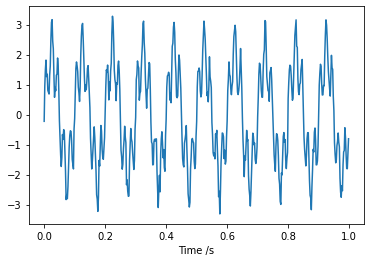

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Time /s')
plt.plot(t, f)

**Рис. 1**. Форма колебаний сигнала с шумом, описанная в тексте

Преобразование Фурье для этой функции является комплексным, его действительная и мнимая компоненты изображены на рис. 2.

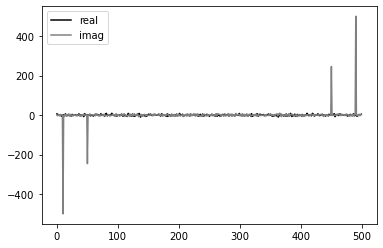

In [25]:
F = np.fft.fft(f)
plt.plot(F.real, 'k', label='real')
plt.plot(F.imag, 'gray', label='imag')
plt.legend(loc=2)
plt.show()

Теперь рассмотрим смещенный амплитудный спектр с компонентой нулевой частоты в центре:

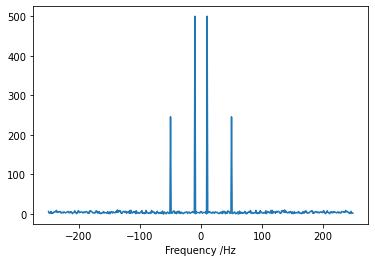

In [26]:
freq = np.fft.fftfreq(n, 1/fsamp)
F_shifted = np.fft.fftshift(F)
freq_shifted = np.fft.fftshift(freq)
plt.plot(freq_shifted, np.abs(F_shifted))
plt.xlabel('Frequency /Hz')
plt.show()

**Рис. 2**. Преобразование Фурье формы колебаний сигнала с шумом с двумя частотными
компонентами, изображенное совместно с частотой

Теперь,поскольку рассматриваемая здесь входная функция действительная, ее преобразование Фурье является эрмитовым: комплексные отрицательные компоненты частоты являются сопряженными с положительными компонентами частоты, поэтому не содержат какой-либо дополнительной информации. Таким образом, необходимо работать только с первой половиной массива ```F```. Изображение вместе с  соответствующими (положительными) значениями
частоты как амплитудного спектра показано на рис. 3:

In [27]:
spec = 2/n * np.abs(F[:n//2])
plt.plot(freq[:n//2], spec, 'k')
plt.xlabel('Frequency /Hz')
plt.show()

**Рис. 3**. Положительные компоненты частоты преобразования Фурье для формы колебаний сигнала с шумом, нормализованные для выделения их интенсивностей

Обратите внимание: поскольку был определен способ выполнения этого дискретного преобразования Фурье, требуется коэффициент нормализации ```2/n``` для точного восстановления исходных значений амплитуды каждой компоненты.

Амплитуды сигналов с частотой 10 Гц и 50 Гц легко решаются в этом спектре.
Обратное преобразование Фурье определяется формулой

![4.png](4.png)

Его возвращает метод ```np.fft.ifft```. Если, как уже было отмечено ранее, массив входной функции содержит действительные значения и  необходимы только неотрицательные компоненты частоты, то можно воспользоваться методами ```np.fft.rfft```, ```np.fft.irfft```, ```np.fft.rfftfreq```.

## Двумерные быстрые преобразования Фурье

Выполнение дискретных преобразований Фурье и обратных им преобразований в двух и более измерениях обеспечивается методами ```np.fft.fft2```, ```np.fft.ifft2```, ```np.fft.fftn``` и  ```np.fft.ifftn```. Двумерное дискретное преобразование Фурье определяется формулой

![5.png](5.png)

где j = 0, 1, 2, …, m − 1; k = 0, 1, 2, …, n − 1.
Измерения более высокого порядка определяются аналогично

**Пример 1**. Двумерное дискретное преобразование Фурье интенсивно используется при обработке изображений. Например, умножение дискретного преобразования Фурье изображения на двумерную гауссову функцию – это общепринятый способ размытия изображения посредством уменьшения величины его высокочастотных компонентов. Код в листинге 1 создает изображение случайно размещенных небольших квадратов, затем размывает изображение с помощью гауссова фильтра.

**Листинг 1**. Размытие изображения с использованием гауссова фильтра

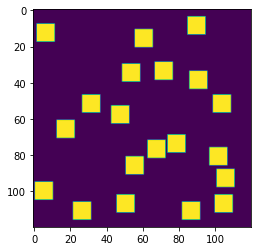

In [28]:
# eg6-fft2 -blur.py
import numpy as np
import matplotlib.pyplot as plt
# Размер изображения, длина стороны квадрата, количество квадратов.
ncols, nrows = 120, 120
sq_size, nsq = 10, 20
# Массив изображения (0 = фон, 1 = квадрат) и массив логических значений для позиций,
# в которых разрешено добавлять квадраты так, чтобы они не касались друг друга
# и границ изображения.
image = np.zeros((nrows, ncols))
sq_locs = np.zeros((nrows, ncols), dtype=bool)
sq_locs[1:-sq_size -1:,1:-sq_size -1] = True
def place_square():
    """ Place a square at random on the image and update sq_locs. """
    # """ Размещение квадрата в случайной локации изображения и обновление sq_locs. """
    # valid_locs - массив индексов элементов True в sq_locs.
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # Случайный выбор одного такого элемента и добавление квадрата так, чтобы его верхний
    # левый угол располагался в этой локации; затем обновление sq_locs.
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0, i-sq_size -1), max(0, j-sq_size -1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False
    # Добавление требуемого количества квадратов в изображение.

for i in range(nsq):
    place_square()
plt.imshow(image)
plt.show()

Следует отметить, что в составе библиотеки SciPy имеется полнофункциональный пакет обработки изображений ```scipy.ndimage```, не  рассматриваемый в  этом курсе. Пример в листинге 2 предназначен только для демонстрации синтаксиса и формата реализации двумерного быстрого преобразования Фурье в библиотеке NumPy.

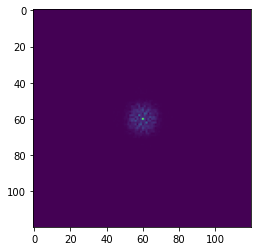

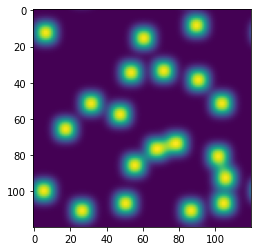

In [29]:
# Применение двумерного ДПФ и центрирование значений частот.
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
plt.imshow(np.abs(ftimage))
plt.show()
# Создание и применение гауссова фильтра.
sigmax, sigmay = 10, 10
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
ftimagep = ftimage * gmask
plt.imshow(np.abs(ftimagep))
plt.show()
# Завершающий этап: применение обратного преобразования и вывод размытого изображения.
imagep = np.fft.ifft2(ftimagep)
plt.imshow(np.abs(imagep))
plt.show()

**Рис. 2**. Размытие изображения с помощью гауссова фильтра, примененного к двумерному преобразованию Фурье сгенерированной картинки

# Упражнения

**Вопросы**

**В 1**. Сравнить скорость выполнения алгоритма ```np.fft.fft``` из библиотеки
NumPy и непосредственной (собственной) реализации формулы

![1.png](1.png)

Совет: необходимо интерпретировать формулу как операцию умножения матриц, т. е. скалярное произведение массива с ```n``` значениями функции
(используются случайные значения) и массива ```n×n``` с элементами ```exp(−2πimk/n)```
при ```m```, ```k = 0, 1, …, n − 1```. Использовать магическую функцию IPython ```%timeit```.